In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Leave-one-out analysis

In [2]:
print(pd.read_csv('accuracy-leave-one-out.csv', parse_dates=True).groupby(['model', 'informed', 'use_ED_visits'])['WIS'].mean())
print('\n')
print(pd.read_csv('accuracy-leave-one-out.csv', parse_dates=True).groupby(['model','informed', 'use_ED_visits', 'season'])['WIS'].mean())

model                informed  use_ED_visits
oneStrain            False     False            0.107723
                               True             0.099522
                     True      False            0.083015
                               True             0.085229
sequentialTwoStrain  False     False            0.108011
                               True             0.103508
                     True      False            0.084234
                               True             0.077877
Name: WIS, dtype: float64


model                informed  use_ED_visits  season   
oneStrain            False     False          2014-2015    0.134766
                                              2015-2016    0.129770
                                              2016-2017    0.123056
                                              2017-2018    0.094468
                                              2018-2019    0.095871
                                              2019-2020    0.112667
       

In [4]:
# load data
data = pd.read_csv('accuracy-leave-one-out.csv', parse_dates=True)
# append number of peaks
data.loc[data['season'].isin(['2014-2015', '2015-2016', '2017-2018', '2023-2024']), 'peaks'] = 'one'
data.loc[data['season'].isin(['2016-2017', '2018-2019', '2019-2020', '2017-2018']), 'peaks'] = 'multiple' # double counting 2017-2018 because it is an edge case
# groupby number of peaks
print(data.groupby(['model','informed', 'use_ED_visits', 'peaks'])['WIS'].mean())

model                informed  use_ED_visits  peaks   
oneStrain            False     False          multiple    0.106209
                                              one         0.109760
                               True           multiple    0.103560
                                              one         0.094089
                     True      False          multiple    0.091790
                                              one         0.071208
                               True           multiple    0.095056
                                              one         0.072007
sequentialTwoStrain  False     False          multiple    0.111797
                                              one         0.102917
                               True           multiple    0.102608
                                              one         0.104720
                     True      False          multiple    0.091038
                                              one         0.075080
       

## Incremental calibration 2023-2024

In [5]:
data = pd.read_csv('accuracy-training-x.csv', parse_dates=True).groupby(['model', 'training_horizon', 'use_ED_visits', 'season'])['WIS'].mean()

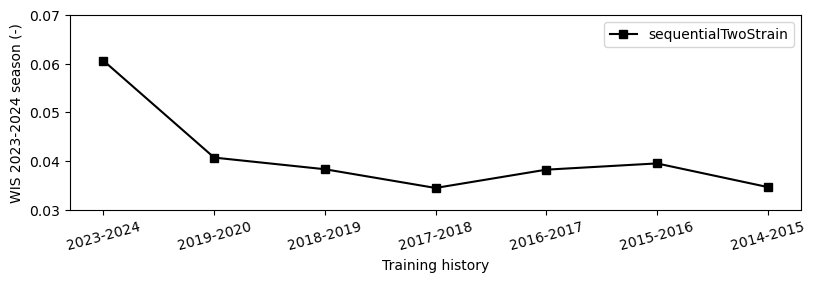

In [6]:
fig,ax=plt.subplots(figsize=(8.3, 11.7/4))
# sequentialTwoStrain
ax.plot(data.index.get_level_values('training_horizon').unique(), data.values, marker='s', color='black', markersize=6, label='sequentialTwoStrain')
# oneStrain

# formatting
ax.set_ylim([0.03, 0.07])
ax.set_xticks(data.index.get_level_values('training_horizon').unique())
ax.set_xticks(ax.get_xticks(), ['2023-2024', '2019-2020', '2018-2019', '2017-2018', '2016-2017', '2015-2016', '2014-2015'], rotation=15, ha='center')
ax.set_xlabel('Training history')
ax.set_ylabel('WIS 2023-2024 season (-)')
ax.legend()
plt.tight_layout()
plt.show()
plt.close()